In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('stocks/total_data.csv' , index_col = 'Unnamed: 0')
df.head()

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume
0,MMM,2015-01-02,164.710007,165.080002,162.729996,164.059998,140.665863,2116400.0
1,MMM,2015-01-05,163.000000,163.639999,160.080002,160.360001,137.493500,3692900.0
2,MMM,2015-01-06,160.820007,161.369995,157.740005,158.649994,136.027313,3532000.0
3,MMM,2015-01-07,159.899994,160.279999,158.940002,159.800003,137.013367,3081300.0
4,MMM,2015-01-08,160.649994,163.690002,160.520004,163.630005,140.297195,3142900.0


### Number of Unique Symbols

In [5]:
symbols  = df['Symbol'].unique()
print(len(symbols))

503


In [59]:
df[df['Date'] == '2017-01-02']

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume
265147,GPS,2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN


### Check for Null values and remove them

In [61]:
df[df.isna().any(axis=1)]

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume
63897,AMAT,2017-02-20,NaN,NaN,NaN,NaN,NaN,NaN
110316,CAH,2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN
113793,CAT,2016-01-18,NaN,NaN,NaN,NaN,NaN,NaN
265147,GPS,2017-01-02,NaN,NaN,NaN,NaN,NaN,NaN
284113,HAL,2018-12-05,NaN,NaN,NaN,NaN,NaN,NaN
423999,MOS,2018-12-05,NaN,NaN,NaN,NaN,NaN,NaN
435880,NEM,2018-12-05,NaN,NaN,NaN,NaN,NaN,NaN
461230,ODFL,2018-12-05,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
df.dropna(inplace = True)

### Looking for symbols with the price range less than our period (2015-01-01 to 2020-04-01)
**After finding the incompelete symbols, we will remove them**

In [74]:
days_cnt = df[['Date', 'Symbol']].groupby(['Symbol']).count()
days_cnt = days_cnt.reset_index()
imperfect_symbols = days_cnt[days_cnt['Date'] < 1320]['Symbol'].tolist()


[]

In [73]:
df = df[df['Symbol'].apply(lambda x:x not in imperfect_symbols)]

### Check stocks price range over the period

In [75]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,640200.000000,640200.000000,640200.000000,640200.000000,640200.000000,6.402000e+05
mean,107.313599,108.416300,106.181197,107.334983,103.224936,4.246894e+06
std,174.097322,176.053372,172.152155,174.159342,174.116179,8.536613e+06
min,1.620000,1.690000,1.610000,1.620000,1.620000,0.000000e+00
25%,44.799999,45.270000,44.310001,44.814970,41.466189,1.008800e+06
50%,72.330002,73.040001,71.610001,72.349998,67.505615,1.995600e+06
75%,116.599998,117.680000,115.470001,116.629997,111.615496,4.247900e+06
max,4025.000000,4071.129883,3986.949951,4037.770020,4037.770020,4.485859e+08


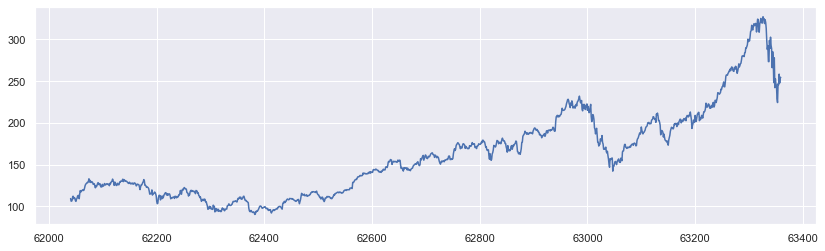

In [81]:
sns.set(rc={'figure.figsize':(14, 4)})
df[df['Symbol'] == 'AAPL']['Close'].plot()